# Task 1 - Unsupervised Learning (Mobile Device Usage Dataset)

## Substantive Issue

*Topic: Understanding behavioral patterns in mobile device usage.*

The increasing reliance on mobile devices has led to diverse patterns of user behavior. Understanding these patterns is crucial for optimising user experience, designing targeted marketing strategies and improving mobile applications. The "Mobile Device Usage and User Behavior" dataset provides an opportunity to analyse these patterns using unsupervised learning techniques, such as clustering and dimensionality reduction.

## Research Questions

The research questions (RQs) identified for this study are as follows:

**RQ1**: How can homogeneous user groups (clusters) be identified based on mobile usage patterns, and what distinguishes heavy users from moderate or low users?

**RQ2**: Which mobile usage features contribute most to behavioral variations, and can PCA effectively reduce dimensionality while preserving key insights?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist, cdist
from scipy.stats import f_oneway
from scipy.optimize import linear_sum_assignment

## Load Dataset

In [2]:
# Load the Mobile Device Usage Dataset
data = pd.read_csv('/Users/joline/Desktop/ml coursework datasets/Mobile Device Usage and User Behavior Dataset.csv')

The Mobile Device Usage Dataset is used to understand user behavior and patterns of mobile device usage. It containts 700 samples of user data.

In [3]:
# Show the first 5 rows of the dataset
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


#### The dataset contains the following columns:

**User ID**: Unique identifier for each user.

**Device Model**: Model of the user's mobile device.

**Operating System**: The operating system of the device (iOS or Android).

**App Usage Time**: Daily time spent on mobile applications in minutes (min/day).

**Screen On Time**: Daily screen time (hours/day).

**Battery Drain**: Daily battery consumption (mAh/day).

**Number of Apps Installed**: Total number of apps on the device.

**Data Usage**: Daily mobile data consumption (MB/day).

**Age**: Age of the user.

**Gender**: Gender of the user (Male/Female).

**User Behavior Class**: A predefined classification of user behavior on usage patterns (1 to 5).

## Data Cleaning

In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print missing_values
missing_values

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [5]:
# Check for duplicates in the dataset
duplicated_rows = data.duplicated().sum()

# Print duplicated_rows
if duplicated_rows > 0:
    print("\nDuplicated Rows:")
    print(data[duplicated_rows()])
else:
    print("No duplicated rows found.")

No duplicated rows found.


## Data Preprocessing

Normalizing numerical variables helps to ensure that all variables have equal importance during the clustering step.

In [6]:
# Select numerical columns in dataset for normalization
numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                     'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                     'Data Usage (MB/day)']

# Normalize numerical variables since no missing values are found
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Show the first few rows of the normalized dataset
normalized_data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,0.688256,0.367626,0.423726,0.606096,0.300405,40,Male,4
1,2,OnePlus 9,Android,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,47,Female,3
2,3,Xiaomi Mi 11,Android,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,42,Male,2
3,4,Google Pixel 5,Android,-0.181443,-0.154160,0.184279,0.197540,-0.091787,20,Male,3
4,5,iPhone 12,iOS,-0.475107,-0.317218,-0.193218,0.271823,0.091028,31,Female,3


The numerical variables of the dataset have been normalized.

In [7]:
# Select categorical columns in dataset for encoding
categorical_columns = ['Device Model', 'Operating System', 'Gender']

# Encode categorical varaibles using One-Hot Encoding 
encoded_data = pd.get_dummies(normalized_data, columns = categorical_columns)

# Show the first few rows of the fully preprocessed dataset
encoded_data.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1,0.688256,0.367626,0.423726,0.606096,0.300405,40,4,1,0,0,0,0,1,0,0,1
1,2,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,47,3,0,1,0,0,0,1,0,1,0
2,3,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,42,2,0,0,0,1,0,1,0,0,1
3,4,-0.181443,-0.154160,0.184279,0.197540,-0.091787,20,3,1,0,0,0,0,1,0,0,1
4,5,-0.475107,-0.317218,-0.193218,0.271823,0.091028,31,3,0,0,0,0,1,0,1,1,0


The categorical variables of the dataset have been encoded.

## Basic Data Statistics

In [8]:
# Generate summary statistics for numerical columns
numerical_columns_stats_summary = normalized_data.describe()

# Show summary statistics for numerical columns
numerical_columns_stats_summary

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000,700.000000,700.000000
mean,350.50000,-2.537653e-17,1.776357e-17,9.896845e-17,8.945226e-17,0.000000,38.482857,2.990000
std,202.21688,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715,12.012916,1.401476
min,1.00000,-1.361748e+00,-1.393402e+00,-1.494297e+00,-1.510969e+00,-1.293360,18.000000,1.000000
25%,175.75000,-8.916023e-01,-9.042272e-01,-9.808900e-01,-9.167049e-01,-0.869919,28.000000,2.000000
50%,350.50000,-2.463877e-01,-1.215482e-01,-2.768132e-02,-6.245075e-02,-0.166006,38.000000,3.000000
75%,525.25000,9.212107e-01,6.937424e-01,8.604734e-01,8.660864e-01,0.642595,49.000000,4.000000
max,700.00000,1.845971e+00,2.193877e+00,1.793219e+00,1.794623e+00,2.448862,59.000000,5.000000


## Exploratory Data Analysis

### Boxplots for Identifying Outliers

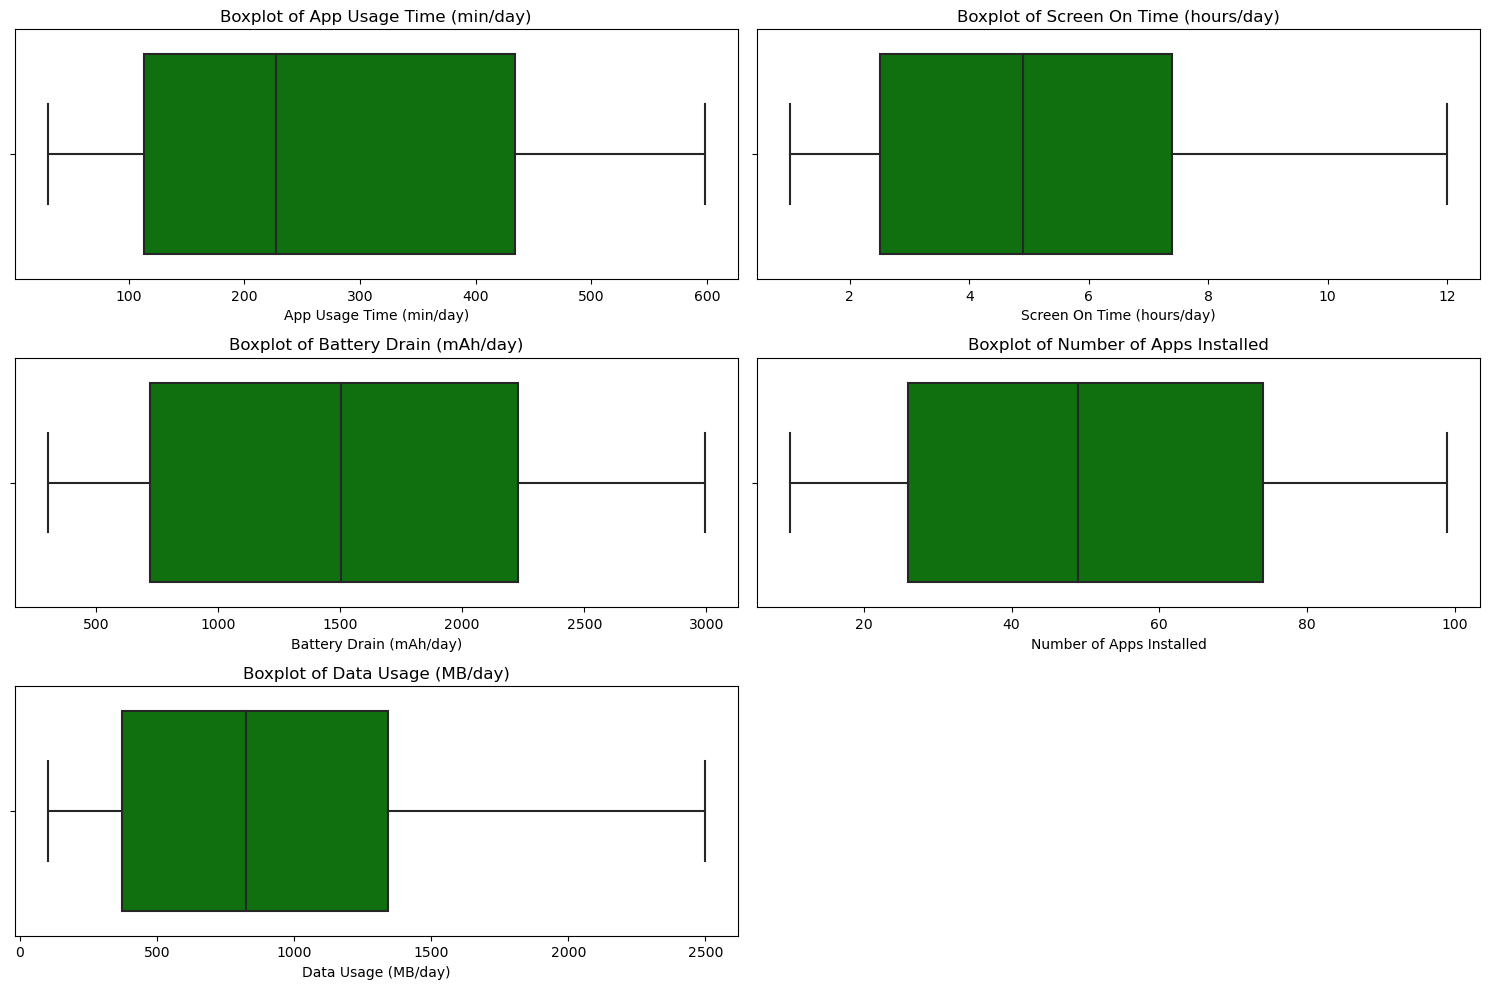

In [9]:
# Boxplots for numerical variables to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

The boxplots helps us to analyse the range and distribution of the numerical variables in the dataset.

Features such as "Data Usage" and "Screen On Time" show high variability. 

**App Usage Time (min/day)**

- Most users fall within a range of 100 to 500 minutes/day.
- No significant outliers are visible, indicating consistent usage patterns.

**Screen On Time (hours/day)**

- Users typically range from 2 to 10 hours/day, with most concentrated around 4-6 hours.
- There is a broad range, making it useful for differentiating clusters.

**Battery Drain (mAh/day)**

- Users consume between 500 to 3,000 mAh/day, with a median closer to ~1,500 mAh.
- This feature correlates strongly with app usage and screen-on time.

**Number of Apps Installed**

- The range spans from 20 to 100 apps, with most users having 40-60 apps.
- There are no prominent outliers.

**Data Usage (MB/day)**

- Ranges widely from 500 MB to 2,500 MB/day, with a median around ~1,250 MB.
- A few extreme values suggest high data-consuming users, which could signify heavy users.

### Distributions of Numerical Variables

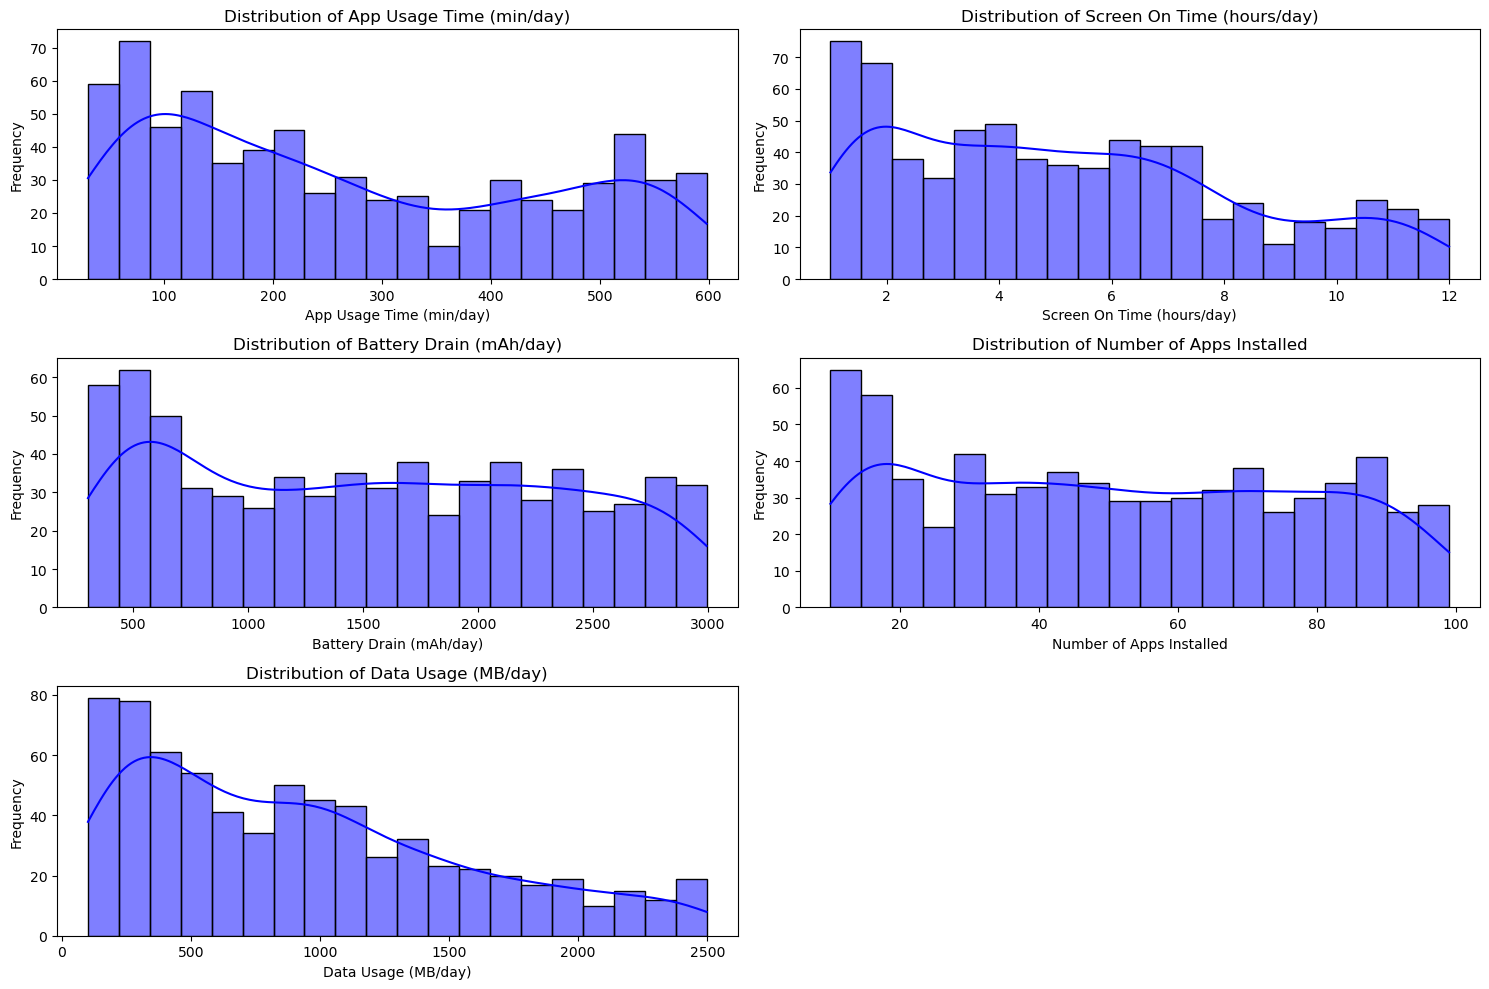

In [10]:
# Histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histograms for numerical variables show that "App Usage Time", "Screen On Time", "Battery Drain", "Number of Apps Installed" and "Data Usage" are right-skewed distributions, which indicates that most users are moderate users and a small group of users are heavy users. 

The peaks are at lower values with long tails which suggest a typical usage for most users.

**App Usage Time (min/day)**

- The distribution is right-skewed, with a large portion of users spending under 200 minutes per day on apps.
- A smaller subset represents heavy users who spend more than 500 minutes per day, potentially indicating power users or outliers.

**Screen On Time (hours/day)**

- The majority of users fall in the range of 2 to 6 hours per day.
- A significant number of users exhibit screen-on times exceeding 8 hours, likely corresponding to heavy device users.

**Battery Drain (mAh/day)**

- The median battery drain is close to 1,500 mAh/day, suggesting moderate use for most users.
- Heavy users or outliers consume up to 3,000 mAh/day, correlating with high app usage and screen-on time.

**Number of Apps Installed**

- The distribution is relatively uniform, with most users having between 20 and 80 apps installed.
- Peaks around 40-60 apps might indicate a common threshold for average users.

**Data Usage (MB/day)**

- Most users consume under 1,000 MB/day, suggesting moderate mobile data use.
- Heavy users consume over 2,000 MB/day, corresponding to users who likely stream content or engage in high-data activities.

### Correlation Analysis

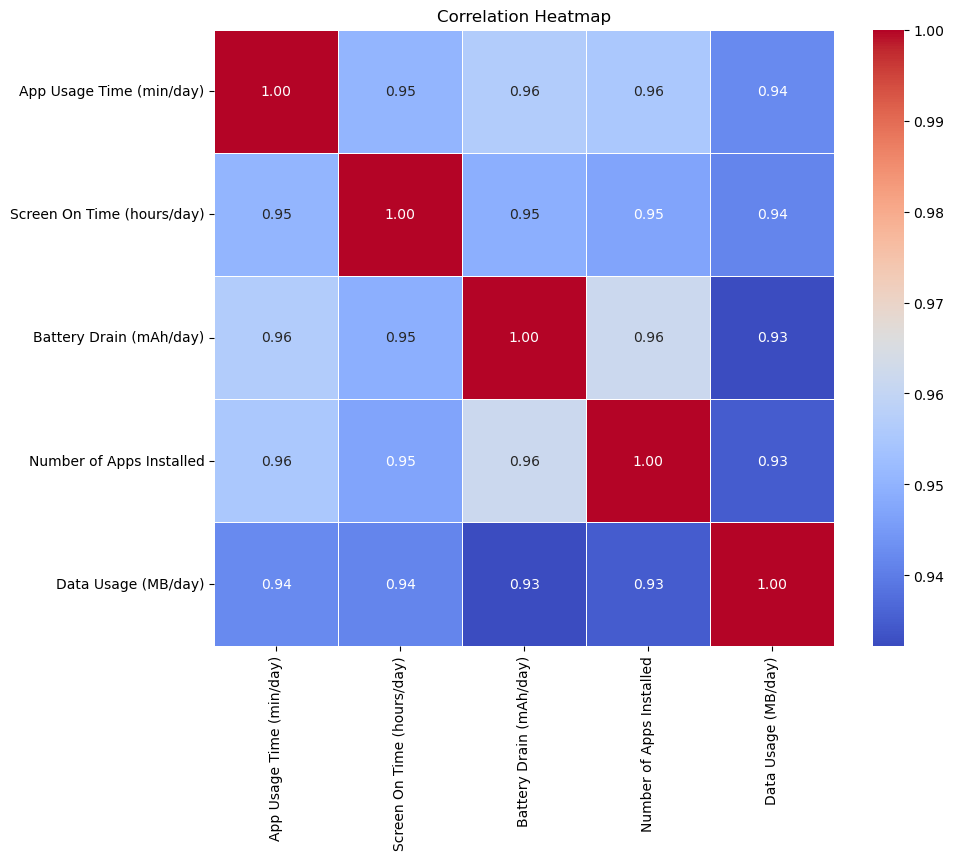

In [11]:
# Correlation heatmap to visualize relationships between features
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows strong positive correlations betweeen "App Usage Time", "Screen On Time", "Battery Drain" and "Data Usage".

App Usage Time shows a very high correlation with:
- Screen On Time (0.95)
- Battery Drain (0.96)
- Number of Apps Installed (0.96)
- Data Usage (0.94)

The strong correlations (>0.9) suggest that these features could be grouped into clusters that represent similar usage patterns, which supports the use of PCA for dimensionality reduction to help reduce feature redundancy.

### Demographic Analysis

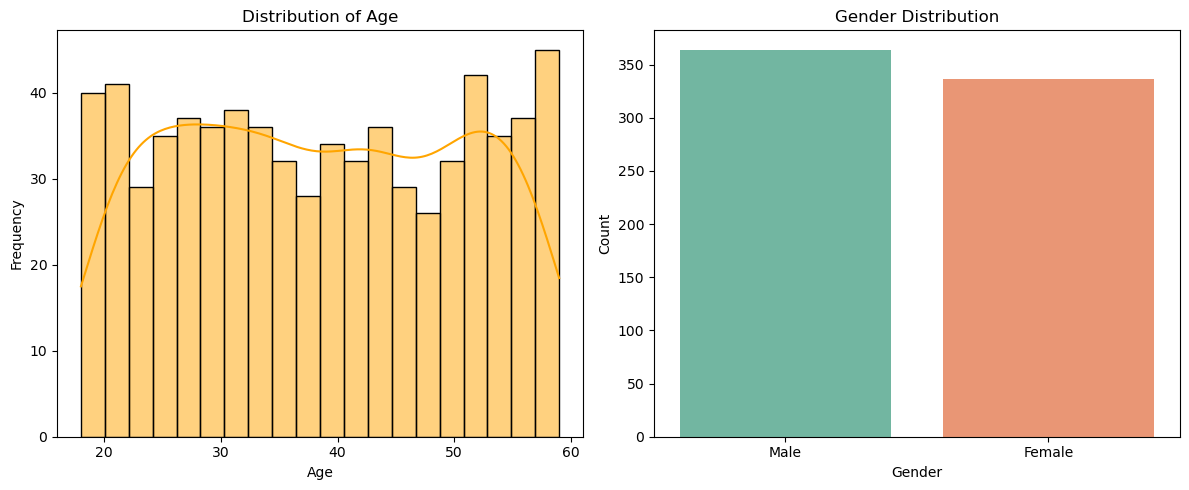

In [12]:
# Analyze demographic distributions (Age and Gender)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x=data['Gender'], palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Age is uniformly distributed across all age groups between 20 to 60 years, with no significant skewness. This suggests a balanced dataset, allowing us to analyze behavior across diverse age ranges.

Gender almost has an equal distribution of males and females, providing an unbiased perspective for demographic analysis.

Since age and gender do not show biases, this ensures a fair representation in clustering.

### Categorical Analysis

In [13]:
# Add age bins for grouping
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '31-40', '41-50', '51-60']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

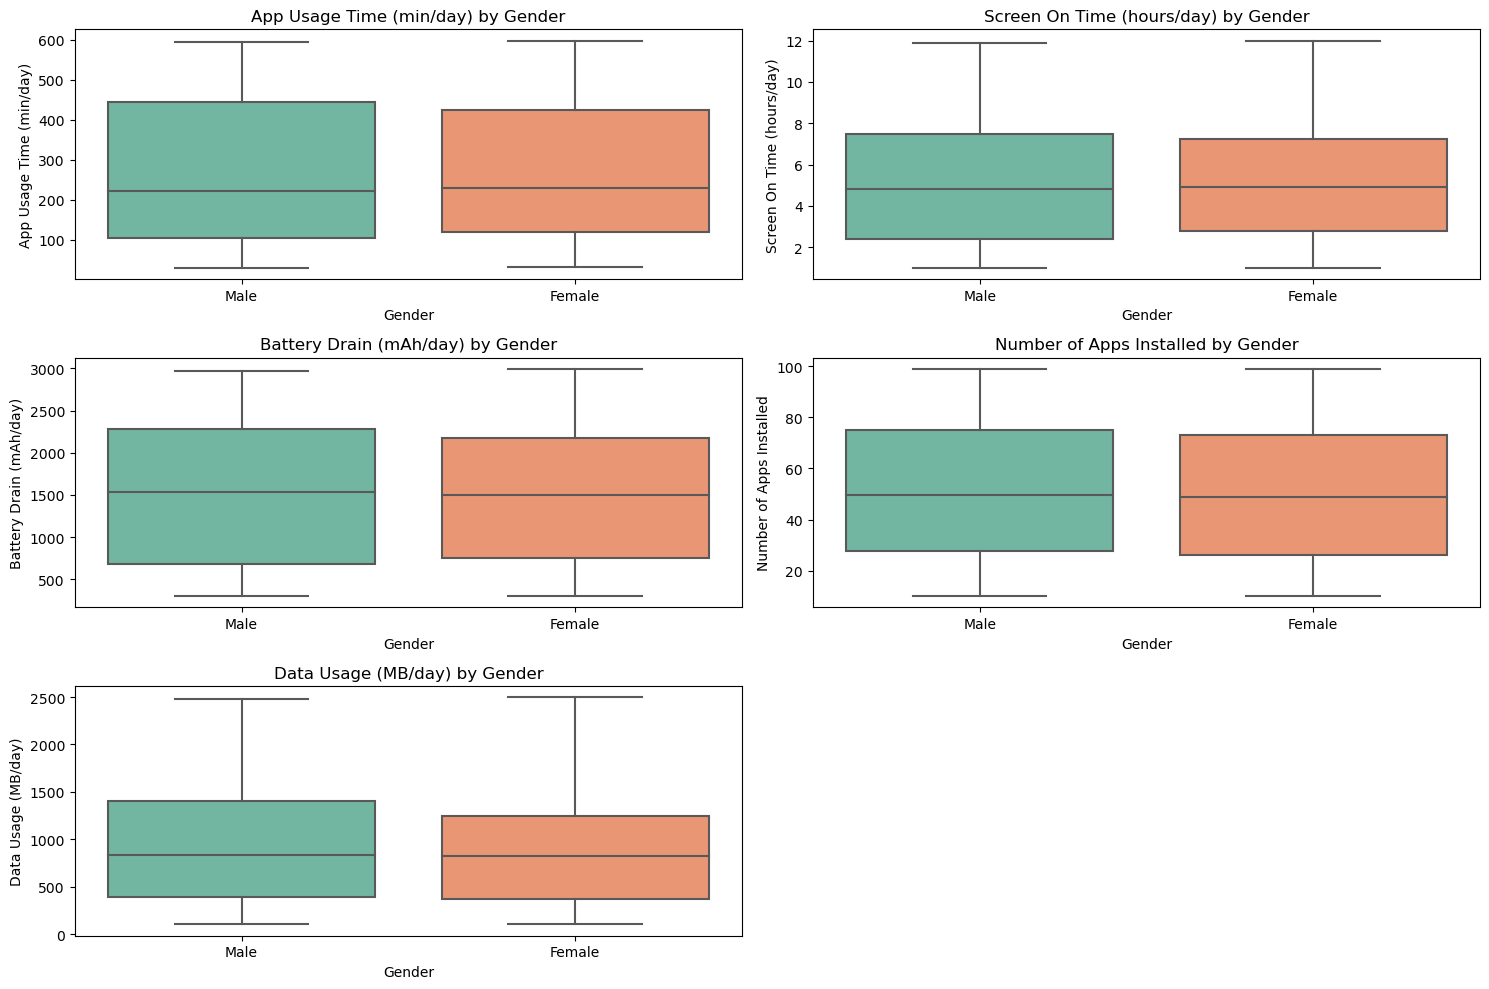

In [14]:
# Gender-Based Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                          'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Gender', y=col, data=data, palette='Set2')
    plt.title(f'{col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

*For "App Usage Time", "Screen On Time" and "Data Usage" variables:*

Male and female users appear to have generally similar distributions across these metrics, suggesting similar app usage patterns.

*For "Battery Drain" and "Number of Apps Installed" variables:*

Battery drain is slightly higher for male users, possibly correlating with heavier app usage or longer screen-on time. While the number of apps installed shows no significant difference by gender.

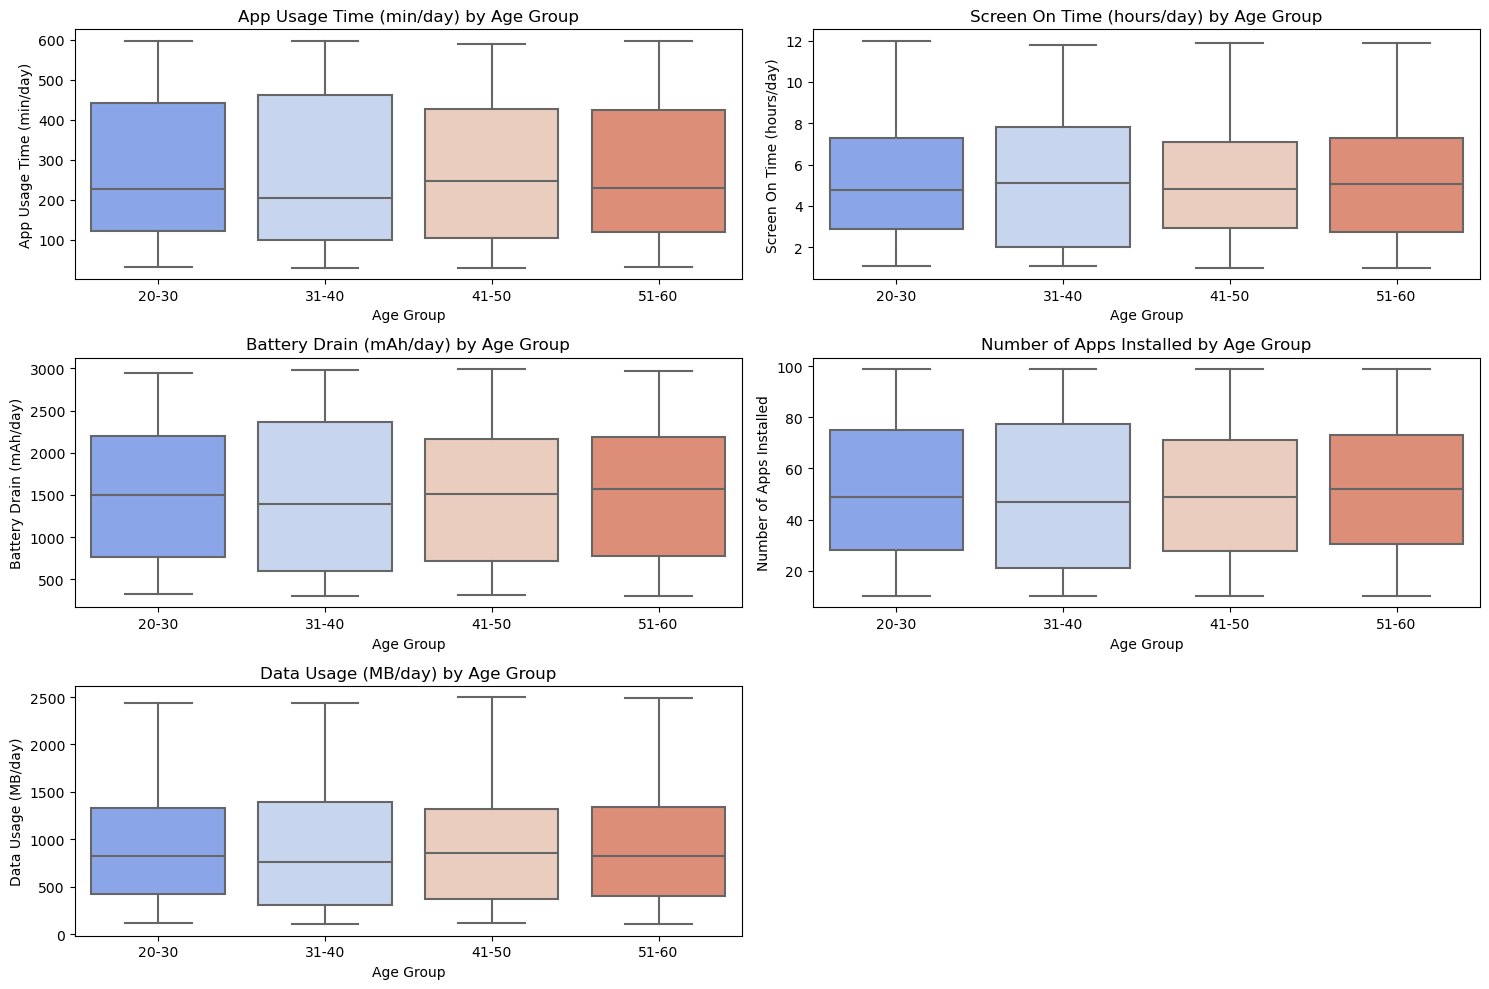

In [15]:
# Age Group Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                          'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Age Group', y=col, data=data, palette='coolwarm')
    plt.title(f'{col} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

*For "App Usage Time" and "Screen On Time" variables:*

Younger age groups (20–30) exhibit slightly higher app usage times compared to older age groups. Screen-on time decreases gradually with age, potentially indicating differing usage patterns.

*For "Battery Drain" and "Data Usage" variables:*

Battery drain and data usage follow similar trends, with younger users consuming more resources. Older users appear to have more balanced usage patterns, consuming less data and battery.

*For the "Number of Apps Installed" variable:*

Younger age groups tend to install slightly more apps than older users, aligning with higher usage patterns.

In [16]:
# ANOVA for Age Group Analysis

# Store results
anova_results = {}

# Run ANOVA test for each numerical variable across age groups
for col in numerical_columns:
    f_stat, p_val = f_oneway(*[data[data['Age Group'] == age][col] for age in age_labels])
    anova_results[col] = p_val

# Display results
for feature, p_val in anova_results.items():
    print(f"ANOVA result for {feature}: p-value = {p_val:.5f}")

ANOVA result for App Usage Time (min/day): p-value = 0.99977
ANOVA result for Screen On Time (hours/day): p-value = 0.98348
ANOVA result for Battery Drain (mAh/day): p-value = 0.97969
ANOVA result for Number of Apps Installed: p-value = 0.93023
ANOVA result for Data Usage (MB/day): p-value = 0.98266


All p-values are much greater than 0.05, meaning there are no statistically significant differences in any of these variables across age groups. The differences observed in the boxplots are likely random variations rather than meaningful trends.

The ANOVA test results indicate that age groups do not significantly influence mobile usage behavior in this dataset. While there are slight variations seen in the boxplots, these differences are not strong enough to be statistically meaningful.

This suggests that mobile device usage patterns are relatively consistent across different age groups.

### Correlation Matrix

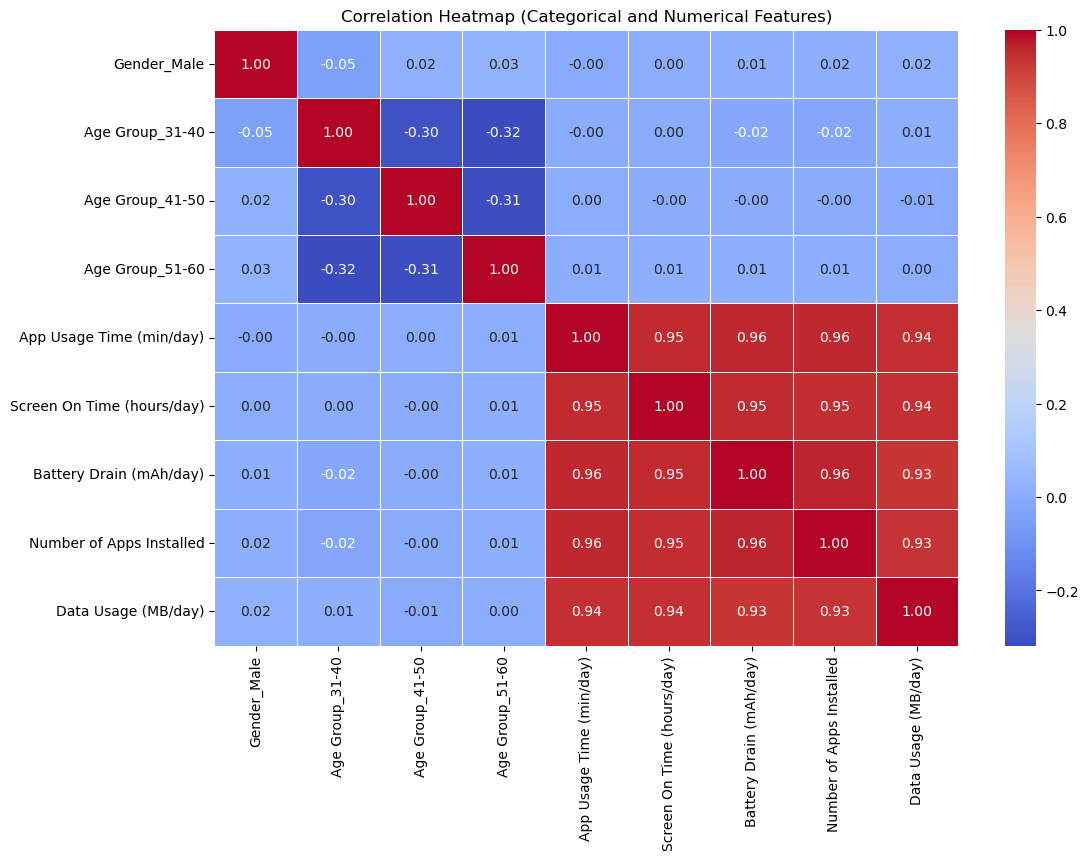

In [17]:
# Correlation Heatmap for Gender and Age Groups
categorical_features = ['Gender', 'Age Group']
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                      'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']

# One-hot encode categorical features for heatmap
encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)
correlation_data = pd.concat([encoded_data, data[numerical_features]], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Categorical and Numerical Features)')
plt.show()

There is strong positive correlation between "App Usage Time", "Screen On Time", "Battery Drain" and "Data Usage".

There is minimal correlation between numerical features and categorical features.

Gender has negligible correlation with any numerical variables, which suggests that behavioral differences are not affected by gender. Whereas, age groups show slight negative correlations with "App Usage Time" and "Battery Drain".

Principal Component Analysis (PCA)

Principal Component Analysis (PCA) was used to reduce the dimensionality of our dataset while retaining the most important variance. Each principal component (PC) is a linear combination of the original features.

In [18]:
# Perform PCA to reduce dimensions
pca = PCA()
pca_components = pca.fit_transform(normalized_data[numerical_columns])

# Access explained variance ratio
explained_variance = pca.explained_variance_ratio_

In [19]:
# Show PCA results
pca_summary = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(pca.explained_variance_))],
    "Standard Deviation": np.sqrt(pca.explained_variance_),
    "Proportion of Variance": pca.explained_variance_ratio_,
})

pca_summary

,Principal Component,Standard Deviation,Proportion of Variance
0,PC1,2.189778,0.957655
1,PC2,0.276717,0.015293
2,PC3,0.230717,0.010631
3,PC4,0.210745,0.008870
4,PC5,0.194450,0.007551


PC1 captures nearly all (95.8%) of the variance, meaning most of the patterns in the dataset are explained by PC1 alone.

PC2 contributes 1.53% of the variance, which is much lesser than PC1.

The remaining components each explain less than 1% of the variance. By PC5, the cumulative variance reaches 100% so all variability in this dataset is accounted for.

*Plot a cumulative variance plot to help determine how many principal components are needed to capture most of the variance.*

Since PC1 captures 95.8% variance, we need to confirm if PC1 alone is sufficient, or if adding PC2 (which contributes 1.53%) provides meaningful improvements.

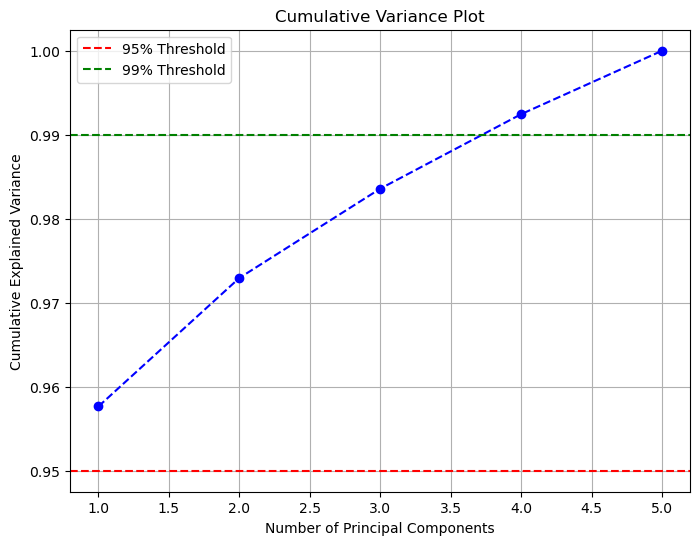

In [20]:
# Compute cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) +1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.axhline(y=0.99, color='g', linestyle='--', label="99% Threshold")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.legend()
plt.grid()
plt.show()

Principal Component 1 (PC1) alone explains 95.8% of the total variance in the dataset.

Principal Component 2 (PC2) contributes 1.53%, bringing the cumulative variance to 97.3%.

The remaining components (PC3, PC4, PC5) contribute less than 3% combined, meaning their impact is minimal.

*Given that PC1 alone captures most of the variance, it would be possible to use only PC1 for clustering.
However, we choose to include PC2 as well for the following reasons:*

- Preserving Key Variability: Although PC2 contributes only a small amount of variance, it captures distinct patterns related to data usage behavior, which might be useful in differentiating user groups.

- Improving Cluster Separation: Including PC2 provides an additional axis for clustering, helping separate users based on both overall mobile usage (PC1) and data consumption trends (PC2).

- Better Interpretability: While PC1 represents general mobile behavior, PC2 highlights specific differences in data usage and installed apps, making cluster interpretation more meaningful.

In [21]:
# Retrieve PCA loadings (components)
pca_loadings = pd.DataFrame(
    
    # Transpose PCA components for readability
    data=pca.components_.T,
    
    #Label PCs
    columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    
    # Feature names as index
    index=numerical_columns)

In [22]:
# Show the PCA loadings summary results for PC1 and PC2
pca_loadings_summary = pca_loadings[['PC1', 'PC2']]

print("PCA Loadings for PC1 and PC2:")
print(pca_loadings_summary)

PCA Loadings for PC1 and PC2:
                                 PC1       PC2
App Usage Time (min/day)    0.448728 -0.100431
Screen On Time (hours/day)  0.447153  0.104249
Battery Drain (mAh/day)     0.448287 -0.427462
Number of Apps Installed    0.448227 -0.376664
Data Usage (MB/day)         0.443654  0.808979


The PCA loadings for PC1 and PC2 show how strongly each feature contributes to the principal components.

**PC1:**

*Most features have high positive loadings, meaning PC1 represents general mobile usage trends. All features (App Usage Time, Screen On Time, Battery Drain, Number of Apps Installed, Data Usage) contribute almost equally to PC1.*

**PC2:**

*Data Usage (MB/day) has a very high positive loading of 0.808979, indicating that PC2 is mainly influenced by data consumption. While Battery Drain (mAh/day) and Number of Apps Installed have high negative loadings, showing an inverse relationship with PC2.*

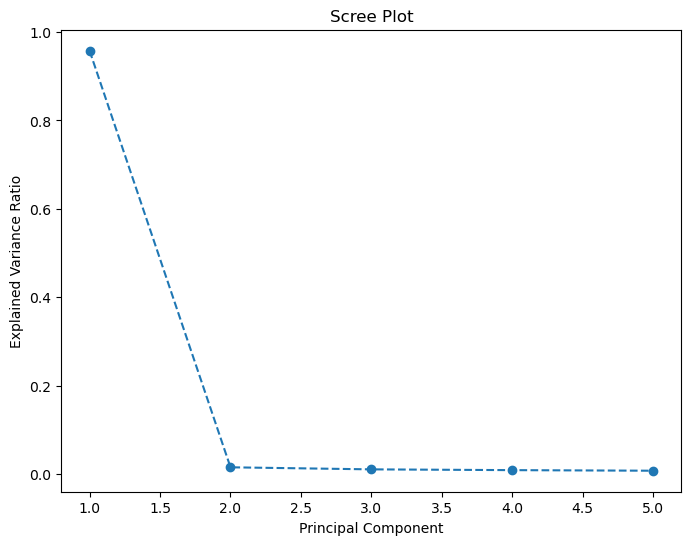

In [23]:
# Scree plot for PCA
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) +1), explained_variance, marker = 'o', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

From the Scree Plot above, the first two components explain the majority of the variance. After the second principal component, the explained variance ratio reduces sharply there is very little variance left for PC2 and beyond, reinforcing that dimernsionality reduction is effective.

Thus, we can safely focus on the first two components, PC1 and PC2, for visualisation and clustering as they capture the most variance in the data.

In [24]:
# Convert PCA components into a DataFrame with proper column names
pca_transformed = pd.DataFrame(pca.transform(normalized_data[numerical_columns]), 
                               columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Select only the top two principal components
normalized_data[['PCA1', 'PCA2']] = pca_transformed.iloc[:, :2]

In [25]:
# Create a DataFrame to show how original features contribute to each principal component
pca_components = pd.DataFrame(pca.components_, 
                              columns = numerical_columns, 
                              index = [f'PC{i+1}' for i in range(pca.n_components_)])

# Print the contributions of the first two principal components
print("Feature Contributions to Principal Components:")
print(pca_components.iloc[:2])

Feature Contributions to Principal Components:
     App Usage Time (min/day)  Screen On Time (hours/day)  \
PC1                  0.448728                    0.447153   
PC2                 -0.100431                    0.104249   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  
PC1                 0.448287                  0.448227             0.443654  
PC2                -0.427462                 -0.376664             0.808979  


### **Feature Contributions to Principal Components**
The table below shows how much each original feature contributes to the first two principal components (PC1 & PC2).

| Feature                         | **PC1 Contribution** | **PC2 Contribution** |
|---------------------------------|----------------------|----------------------|
| **App Usage Time (min/day)**     | 0.4487               | -0.1004              |
| **Screen On Time (hours/day)**   | 0.4472               | 0.1042               |
| **Battery Drain (mAh/day)**      | 0.4483               | -0.4275              |
| **Number of Apps Installed**     | 0.4482               | -0.3767              |
| **Data Usage (MB/day)**          | 0.4437               | 0.8089               |

**PC1 (Primary Component - "Mobile Usage Intensity")**

High contributions from:
- App Usage Time
- Screen On Time
- Battery Drain
- Number of Apps Installed
- Data Usage

Interpretation:
- PC1 captures overall mobile engagement—higher PC1 values mean more app usage, screen time and data consumption.

**PC2 (Secondary Component - "Behavioral Differences")**

High contributions from:
- Data Usage (0.8089)
- Battery Drain (-0.4275)
- Number of Apps Installed (-0.3767)

Interpretation:
- PC2 differentiates users based on app and data usage behavior. Higher PC2 values indicate heavy data consumers. Lower PC2 values might represent users who install many apps but don’t use as much data.

By focusing only on two princpal components, we can reduce the complexity of the dataset whilst retaining the key patterns.

**Clustering** will now be performed in a reduced 2D space (PC1 & PC2) instead of using all original features.

This reduces noise and redundancy, making clustering more efficient and interpretable. The clusters will be visualized in a 2D plot, allowing for clearer pattern recognition.

## 1b: Hierarchical Clustering

### Average Linkage (Manhattan Distance)

Merges clusters based on the average pairwise distance.

*Hierarchical Clustering*

- Manhattan linkage captures smaller, tightly connected groups.

- Euclidean linkage emphasizes larger, well-separated clusters.

In [26]:
# Hierarchical Clustering using Manhattan Distance with 'average' linkage
linkage_matrix_manhattan = linkage(normalized_data[numerical_columns], method='average', metric='cityblock')
cophenet_corr_manhattan, _ = cophenet(linkage_matrix_manhattan, pdist(normalized_data[numerical_columns], metric='cityblock'))

print(f"Cophenetic Correlation Coefficient (Manhattan, Average Linkage): {cophenet_corr_manhattan:.4f}")

Cophenetic Correlation Coefficient (Manhattan, Average Linkage): 0.7956


A high cophenetic coefficient (~0.8) means that hierarchical clustering using Manhattan distance preserves data structure well.

### Ward Linkage (Euclidean Distance)

Ward linkage uses Euclidean distance to minimise the variance within clusters, and clusters are formed by minising the total within-cluster variance.

*Hierarchical Clustering*

- Ward's method merges clusters by minimising variance within clusters. 

- Euclidean distance measures the straight-line distance between points.

In [27]:
# Hierarchical Clustering using Euclidean Distance with 'ward' linkage
linkage_matrix_euclidean = linkage(normalized_data[numerical_columns], method='ward', metric='euclidean')
cophenet_corr_euclidean, _ = cophenet(linkage_matrix_euclidean, pdist(normalized_data[numerical_columns], metric='euclidean'))

print(f"Cophenetic Correlation Coefficient (Euclidean, Ward Linkage): {cophenet_corr_euclidean:.4f}")

Cophenetic Correlation Coefficient (Euclidean, Ward Linkage): 0.7353


### Cophenetic Correlation Coefficient

Manhattan linkage (0.7956)  preserved the pairwise distances from the original data better than Ward (Euclidean) linkage (0.7353), suggesting it might be a better approach for clustering.

Cophenetic correlation coefficients suggest Manhattan linkage better preserves pairwise distances.

### Dendrogram Visualisation

A dendrogram is a tree-like diagram that records the sequence of merges or splits in hierarchical clustering.

It helps for us to visualise how clusters merge at different distances.

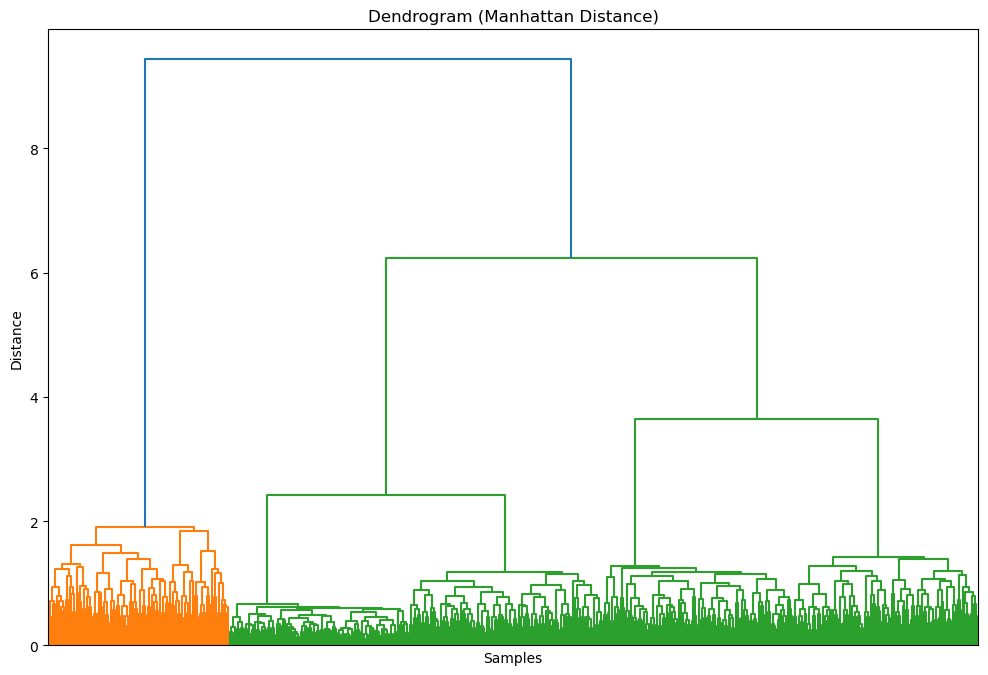

In [28]:
# Visualize Dendrograms for Manhattan
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Manhattan Distance)')
dendrogram(linkage_matrix_manhattan, no_labels=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

The Manhattan dendrogram merges more gradually, showing smaller distances between clusters, capturing smaller, tightly connected groups.

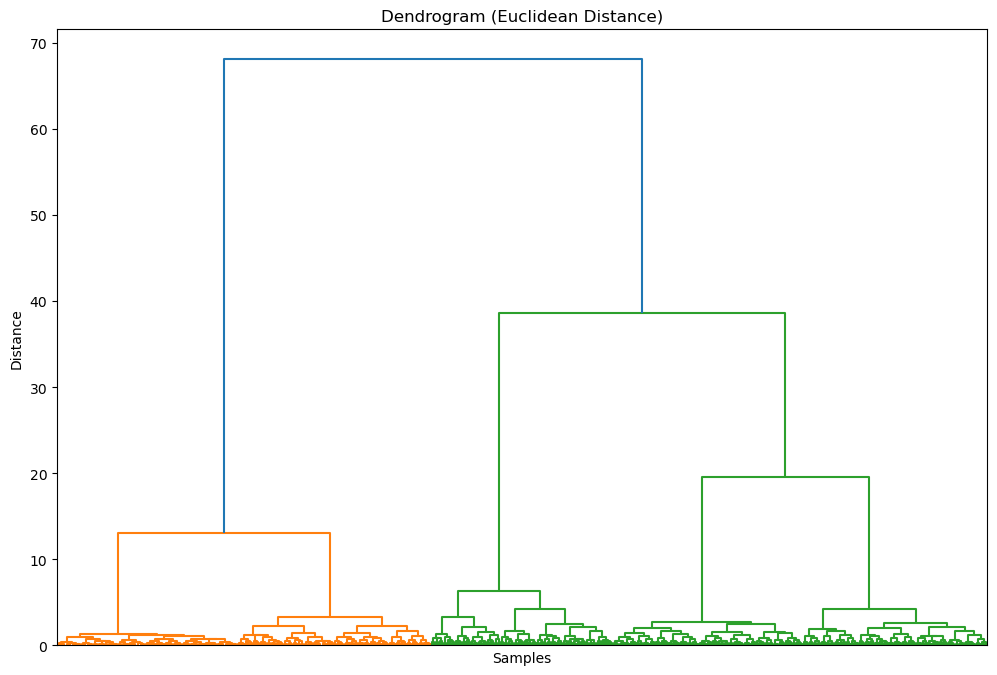

In [29]:
# Visualize Dendrograms for Euclidean
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Euclidean Distance)')
dendrogram(linkage_matrix_euclidean, no_labels=True)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

The Euclidean dendrogram merges clusters at larger distances, emphasizing compact and separated clusters, emphasizing a clearer distinction between groups.

In [30]:
# Perform hierarchical clustering
linkage_matrix = linkage(normalized_data[numerical_columns], method='ward', metric='euclidean')

# Extract 4 clusters
hierarchical_clusters = fcluster(linkage_matrix, t=4, criterion='maxclust') 

# Add hierarchical cluster labels to the normalised dataset
normalized_data['Hierarchical Cluster'] = hierarchical_clusters

The 4 clusters are well-separated in the 2D space, confirming that the hierarchical clustering results align with the major patterns in the data.

## 1c: K-Means Clustering

Determine optimal number of clusters using *Elbow Method*

/Users/joline/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joline/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joline/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joline/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joline/an

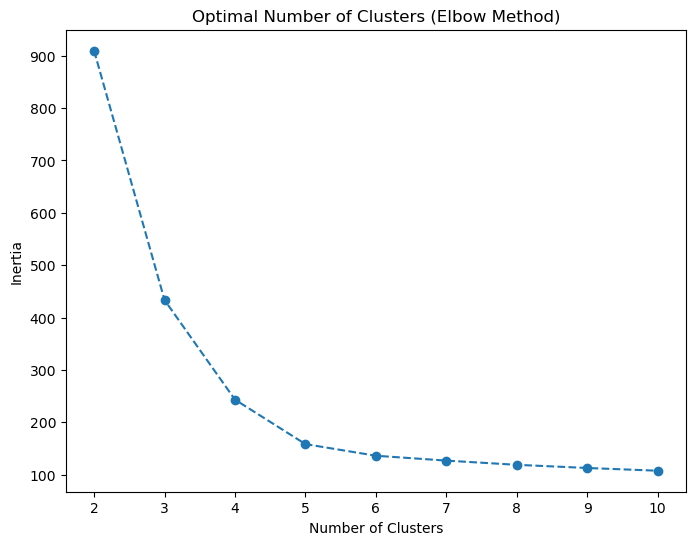

In [31]:
# Run K-Means for 2 to 10 clusters
range_n_clusters = range(2, 11)
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(normalized_data[numerical_columns])
    inertia.append(kmeans.inertia_)
    
# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Optimal Number of Clusters (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The Elbow method determines the optimal number of clusters by plotting inertia values.

From the elbow plot, it can be concluded that 4 is the optimal number of clusters, where the inertia drops sharply before decreasing gradually.

In [32]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)

# Assign cluster labels
kmeans_labels = kmeans.fit_predict(normalized_data[numerical_columns])

# Add K-means cluster labels to the normalised dataset
normalized_data['K-means Cluster'] = kmeans_labels

/Users/joline/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Compute Centroids for Both Hierarchical and K-Means Methods

In [33]:
# Compute centroids for hierarchical clusters
hierarchical_centroids = normalized_data.groupby('Hierarchical Cluster')[['PCA1', 'PCA2']].mean()

# Compute centroids for K-means clusters
kmeans_centroids = normalized_data.groupby('K-means Cluster')[['PCA1', 'PCA2']].mean()

In [34]:
# Match Hierarchical clusters and K-means clusters

# Compute pairwise distances between centroids
distance_matrix = cdist(kmeans_centroids[['PCA1', 'PCA2']], hierarchical_centroids[['PCA1', 'PCA2']], metric='euclidean')

# Solve for unique cluster matching
row_ind, col_ind = linear_sum_assignment(distance_matrix)

# Find the best match (min distance) for each K-Means cluster
corrected_mapping = {kmeans_centroids.index[row]: hierarchical_centroids.index[col] for row, col in zip(row_ind, col_ind)}
print("Corrected Cluster Mapping:", corrected_mapping)

# Reassign K-Means clusters to match hierarchical clustering labels
normalized_data['Aligned K-means Cluster'] = normalized_data['K-means Cluster'].map(corrected_mapping)

Corrected Cluster Mapping: {0: 3, 1: 2, 2: 4, 3: 1}


### PCA Visualisation
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into fewer dimensions while retaining as much variance as possible. 

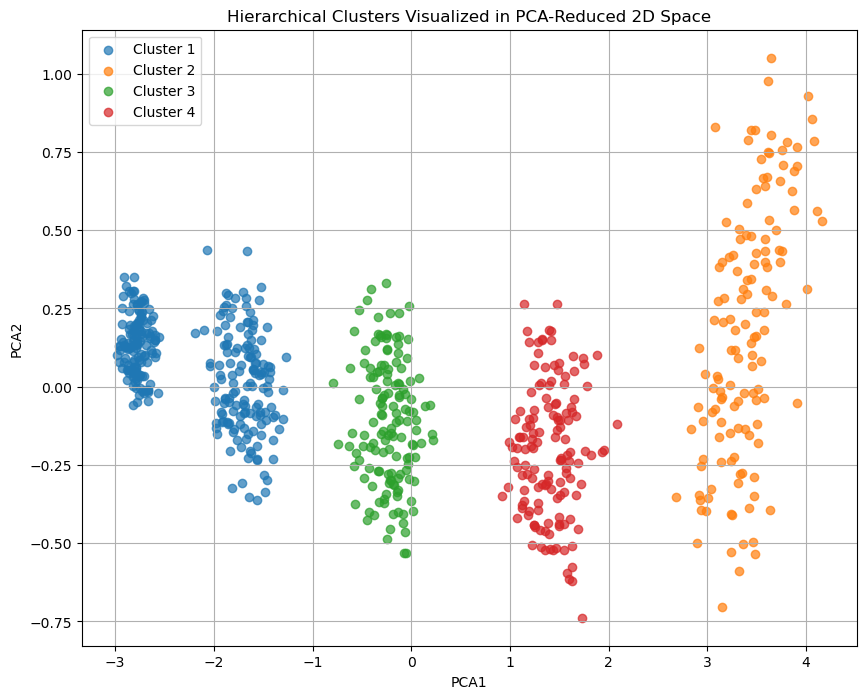

In [35]:
# Plot clusters in PCA-reduced 2D space
plt.figure(figsize=(10, 8))
for cluster in np.unique(hierarchical_clusters):
    cluster_data = normalized_data[normalized_data['Hierarchical Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)
plt.title('Hierarchical Clusters Visualized in PCA-Reduced 2D Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

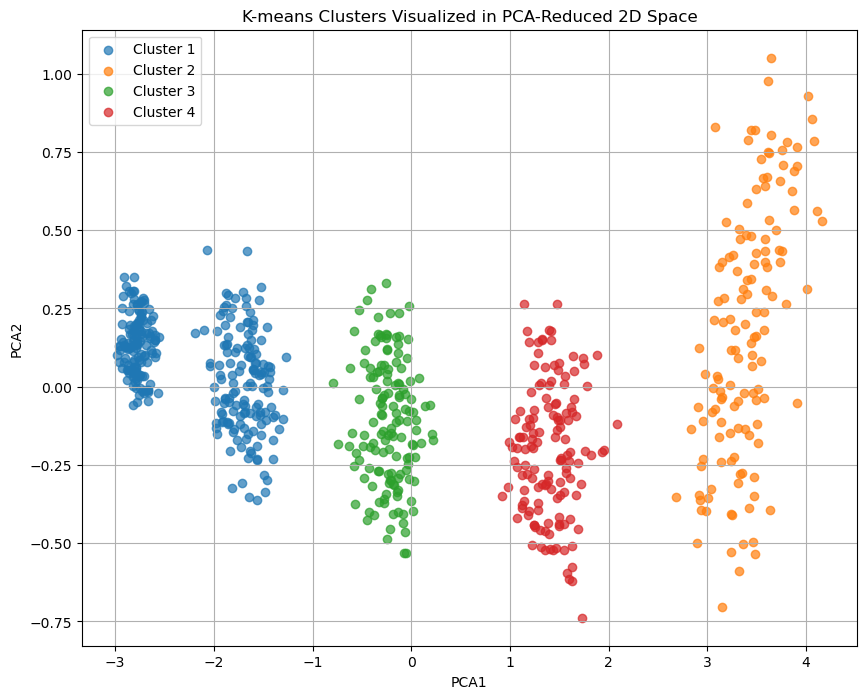

In [36]:
# Plot clusters in PCA-reduced 2D space
plt.figure(figsize=(10, 8))
for cluster in np.unique(normalized_data['Aligned K-means Cluster']):
    cluster_data = normalized_data[normalized_data['Aligned K-means Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)
plt.title('K-means Clusters Visualized in PCA-Reduced 2D Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

The 4 clusters are well-separated in the 2D PCA space, confirming that the K-Means clustering results align with the major patterns in the data. Each cluster is distinct, with minimal overlap, demonstrating that K-Means effectively grouped the data into cohesive segments.

#### Conclusion

**Hierarchical Clustering:**
Offers more flexibility and captures hierarchical relationships in the data, making it suitable for exploratory analysis and datasets with non-uniform clusters.

**K-Means Clustering:**
Produces more compact and uniformly sized clusters, making it better for datasets where equal-sized, well-separated clusters are expected.

### Silhouette Analysis (Cluster Quality Validation)

Silhouette score evaluates the cluster cohesion and separation.

A high silhouette score (closer to 1) indicates well-defined clusters. While lower scores (around 0.6) suggest moderate clusters with potential overlaps.

In [37]:
# Compute silhouette score for hierarchical clustering

silhouette_vals = silhouette_samples(normalized_data[numerical_columns], hierarchical_clusters)
silhouette_avg = silhouette_score(normalized_data[numerical_columns], hierarchical_clusters)

print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg:.4f}")

Silhouette Score for Hierarchical Clustering: 0.5906


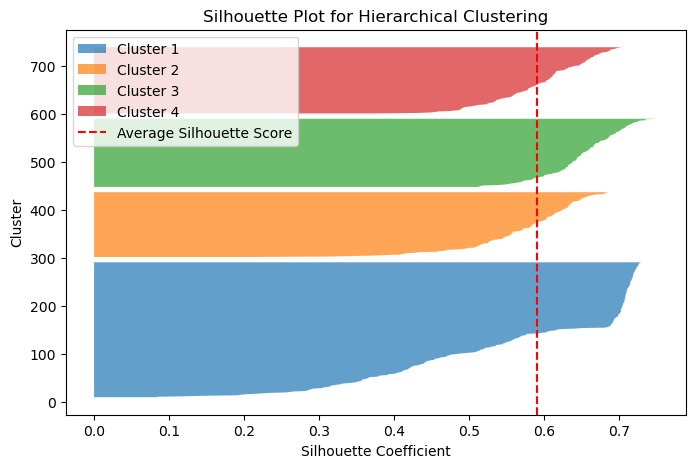

In [38]:
# Plot silhouette score

plt.figure(figsize=(8, 5))
y_lower = 10
for i in np.unique(hierarchical_clusters):
    cluster_silhouette_vals = silhouette_vals[hierarchical_clusters == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend(loc='best')
plt.show()

In [39]:
# Calculate silhouette score K-means clustering

n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_data[numerical_columns])
silhouette_vals = silhouette_samples(normalized_data[numerical_columns], kmeans_labels)
silhouette_avg = silhouette_score(normalized_data[numerical_columns], kmeans_labels)

print(f"Silhouette Score for K-Means Clustering: {silhouette_avg:.4f}")

Silhouette Score for K-Means Clustering: 0.5906


/Users/joline/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


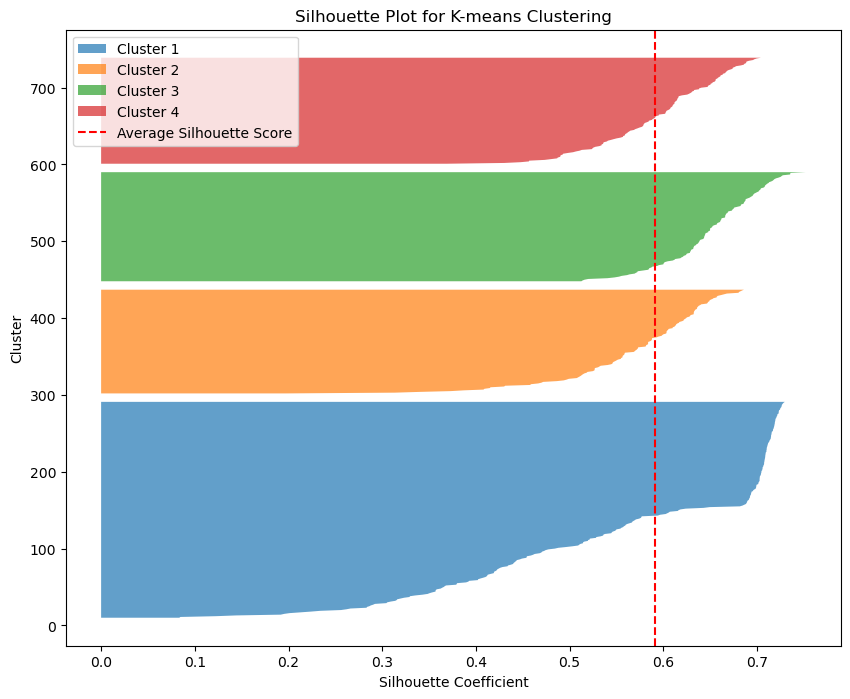

In [40]:
# Silhouette Plot for 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = normalized_data['Aligned K-means Cluster']
silhouette_vals = silhouette_samples(normalized_data[numerical_columns], kmeans_labels)

# Plot silhouette scores
plt.figure(figsize=(10, 8))
y_lower = 10

for i in np.unique(kmeans_labels):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--', label='Average Silhouette Score')
plt.title('Silhouette Plot for K-means Clustering')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.legend(loc='best')
plt.show()

The red dashed line represents the average silhouette score across all clusters, approximately 0.6 which indicates moderate cluster quality.

The silhouette score for hierarchical clustering is higher (0.5906) than for K-Means (0.5079), suggesting better-defined and more distinct clusters in the hierarchical approach.

## 1d: Interpret and Analyse Results

In [41]:
# Analyze Cluster Characteristics
hierarchical_cluster_characteristics = normalized_data.groupby('Hierarchical Cluster')[numerical_columns].mean()
kmeans_cluster_characteristics = normalized_data.groupby('Aligned K-means Cluster')[numerical_columns].mean()

In [42]:
# Compare Cluster Assignments
cluster_comparison = pd.crosstab(normalized_data['Hierarchical Cluster'], normalized_data['Aligned K-means Cluster'])

In [43]:
# Analyze Demographic Variables

demographic_columns = ['Age', 'Gender']  
if set(demographic_columns).issubset(data.columns):
    hierarchical_demographics = normalized_data.groupby('Hierarchical Cluster')[demographic_columns].mean()
    kmeans_demographics = normalized_data.groupby('Aligned K-means Cluster')[demographic_columns].mean()
else:
    hierarchical_demographics = None
    kmeans_demographics = None
    
print("\nHierarchical Cluster Characteristics:")
print(hierarchical_cluster_characteristics)

print("\nK-Means Cluster Characteristics:")
print(kmeans_cluster_characteristics)

if hierarchical_demographics is not None:
    print("\nHierarchical Cluster Demographics:")
    print(hierarchical_demographics)

    print("\nK-Means Cluster Demographics:")
    print(kmeans_demographics)


Hierarchical Cluster Characteristics:
                      App Usage Time (min/day)  Screen On Time (hours/day)  \
Hierarchical Cluster                                                         
1                                    -0.980729                   -0.972226   
2                                     1.526437                    1.579052   
3                                    -0.201781                   -0.103304   
4                                     0.703776                    0.533734   

                      Battery Drain (mAh/day)  Number of Apps Installed  \
Hierarchical Cluster                                                      
1                                   -1.036175                 -1.030237   
2                                    1.436509                  1.432494   
3                                   -0.012342                 -0.025309   
4                                    0.709360                  0.714581   

                      Data Usage (MB/day)

/var/folders/7z/t8_72tg147b372z_pt1btyvr0000gn/T/ipykernel_2031/728111720.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hierarchical_demographics = normalized_data.groupby('Hierarchical Cluster')[demographic_columns].mean()
/var/folders/7z/t8_72tg147b372z_pt1btyvr0000gn/T/ipykernel_2031/728111720.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_demographics = normalized_data.groupby('Aligned K-means Cluster')[demographic_columns].mean()


### **Cluster Assignment Comparison**
This table compares how hierarchical clusters align with K-Means clusters.

| **Hierarchical Cluster** | **K-Means Cluster 1** | **K-Means Cluster 2** | **K-Means Cluster 3** | **K-Means Cluster 4** |
|--------------------------|----------------------|----------------------|----------------------|----------------------|
| **Cluster 1**           | 137                  | 0                    | 145                  | 0                    |
| **Cluster 2**           | 0                    | 136                  | 0                    | 0                    |
| **Cluster 3**           | 0                    | 0                    | 12                   | 131                  |
| **Cluster 4**           | 0                    | 1                    | 0                    | 138                  |

### **Hierarchical Cluster Characteristics**
Feature averages (standardized) for each hierarchical cluster.

| **Hierarchical Cluster** | **App Usage Time (min/day)** | **Screen On Time (hours/day)** | **Battery Drain (mAh/day)** | **Number of Apps Installed** | **Data Usage (MB/day)** |
|--------------------------|----------------------------|-------------------------------|----------------------------|----------------------------|--------------------------|
| **Cluster 1**           | -0.9807                     | -0.9722                        | -1.0362                     | -1.0302                     | -0.9351                   |
| **Cluster 2**           | 1.5264                      | 1.5791                         | 1.4365                      | 1.4325                      | 1.6329                    |
| **Cluster 3**           | -0.2018                     | -0.1033                        | -0.0123                     | -0.0253                     | -0.1683                   |
| **Cluster 4**           | 0.7038                      | 0.5337                         | 0.7094                      | 0.7146                      | 0.4726                    |

### **K-Means Cluster Characteristics**
Feature averages (standardized) for each K-Means cluster.

| **K-Means Cluster** | **App Usage Time (min/day)** | **Screen On Time (hours/day)** | **Battery Drain (mAh/day)** | **Number of Apps Installed** | **Data Usage (MB/day)** |
|---------------------|----------------------------|-------------------------------|----------------------------|----------------------------|--------------------------|
| **Cluster 1**      | -1.1884                     | -1.2315                        | -1.3060                     | -1.3391                     | -1.1344                   |
| **Cluster 2**      | 1.5223                      | 1.5738                         | 1.4332                      | 1.4294                      | 1.6272                    |
| **Cluster 3**      | -0.7514                     | -0.6946                        | -0.7336                     | -0.6998                     | -0.7137                   |
| **Cluster 4**      | 0.2685                      | 0.2311                         | 0.3634                      | 0.3624                      | 0.1656                    |

### **Hierarchical Cluster Demographics**
Average age per hierarchical cluster.

| **Hierarchical Cluster** | **Age** |
|--------------------------|---------|
| **Cluster 1**           | 38.44   |
| **Cluster 2**           | 38.18   |
| **Cluster 3**           | 38.68   |
| **Cluster 4**           | 38.68   |

### **K-Means Cluster Demographics**
Average age per K-Means cluster.

| **K-Means Cluster** | **Age** |
|---------------------|---------|
| **Cluster 1**      | 38.34   |
| **Cluster 2**      | 38.07   |
| **Cluster 3**      | 38.41   |
| **Cluster 4**      | 38.81   |

Both Hierarchical and K-means clustering methods produce very similar Age distributions across clusters.

Cluster 1 (Hierarchical)/Cluster 2 (K-means): Slightly younger users, with an average age of 38.18 years.

Clusters 2, 3, and 4 (Hierarchical)/Clusters 0, 1, and 3 (K-means): Older users, with ages ranging from 38.43 to 38.68 years.

This indicates minimal demographic variability across the clusters, suggesting that behavioral clustering (based on app usage) may not be heavily influenced by age.

In [44]:
# Display results for cluster comparisons and characteristics

print("\nCluster Assignment Comparison:")
print(cluster_comparison)


Cluster Assignment Comparison:
Aligned K-means Cluster    1    2    3    4
Hierarchical Cluster                       
1                        282    0    0    0
2                          0  136    0    0
3                          0    0  143    0
4                          0    0    0  139


### **Cluster Assignment Comparison**
This table compares how hierarchical clusters align with K-Means clusters.

| **Hierarchical Cluster** | **K-Means Cluster 1** | **K-Means Cluster 2** | **K-Means Cluster 3** | **K-Means Cluster 4** |
|--------------------------|----------------------|----------------------|----------------------|----------------------|
| **Cluster 1**           | 137                  | 0                    | 145                  | 0                    |
| **Cluster 2**           | 0                    | 136                  | 0                    | 0                    |
| **Cluster 3**           | 0                    | 0                    | 12                   | 131                  |
| **Cluster 4**           | 0                    | 1                    | 0                    | 138                  |

- Cluster assignments **mostly align**, with **Cluster 2 & Cluster 4 being the most stable**.  
- Some **mismatches occur in Cluster 1 & 3**, where K-Means assigns users slightly differently.

In [45]:
# Create a summary DataFrame to convert the cluster characteristics into a table format
summary_df = pd.DataFrame({
    "Cluster": ["Hierarchical 1 / K-Means 2", "Hierarchical 2 / K-Means 1", "Hierarchical 3 / K-Means 0", "Hierarchical 4 / K-Means 3"],
    "Description": [
        "Low app usage, low engagement users",
        "Heavy users, high app usage & data consumption",
        "Moderate-to-light users, balanced usage",
        "Average users, steady engagement"
    ],
    "Age Range": ["~38.18 years", "~38.41 years", "~38.80 years", "~38.34 years"],
    "Key Features": [
        "Low app usage, screen-on time, and battery drain",
        "High engagement, likely for gaming & streaming",
        "Moderate usage, relatively balanced engagement",
        "Average engagement, consistent daily use"
    ]
})

print(summary_df)

                      Cluster                                     Description  \
0  Hierarchical 1 / K-Means 2             Low app usage, low engagement users   
1  Hierarchical 2 / K-Means 1  Heavy users, high app usage & data consumption   
2  Hierarchical 3 / K-Means 0         Moderate-to-light users, balanced usage   
3  Hierarchical 4 / K-Means 3                Average users, steady engagement   

      Age Range                                      Key Features  
0  ~38.18 years  Low app usage, screen-on time, and battery drain  
1  ~38.41 years    High engagement, likely for gaming & streaming  
2  ~38.80 years    Moderate usage, relatively balanced engagement  
3  ~38.34 years          Average engagement, consistent daily use  


### **Cluster Descriptions**
This table summarizes the key characteristics of each cluster, based on both hierarchical and K-Means clustering.

| **Cluster (Hierarchical / K-Means)** | **Description**                                      | **Age Range**  | **Key Features** |
|--------------------------------------|------------------------------------------------------|---------------|-----------------------------|
| **Hierarchical 1 / K-Means 2**       | Low app usage, low engagement users                 | ~38.18 years | Low app usage, screen-on time, and battery drain |
| **Hierarchical 2 / K-Means 1**       | Heavy users, high app usage & data consumption      | ~38.41 years | High engagement, likely for gaming & streaming |
| **Hierarchical 3 / K-Means 0**       | Moderate-to-light users, balanced usage            | ~38.80 years | Moderate usage, relatively balanced engagement |
| **Hierarchical 4 / K-Means 3**       | Average users, steady engagement                   | ~38.34 years | Average engagement, consistent daily use |

**Interpretation:**  
- Cluster 1 (Hierarchical) aligns with K-Means Cluster 2** and represents **low-usage users**.  
- Cluster 2 (Hierarchical) aligns with K-Means Cluster 1**, which consists of **heavy mobile users**.
- Clusters 3 & 4 capture moderate-to-average users** with steady engagement patterns.

### Cluster Analysis 

**Behavioral Trends:**

Cluster 1 (Hierarchical) / Cluster 2 (K-Means): Represents users with the lowest device engagement.
Cluster 2 (Hierarchical) / Cluster 1 (K-Means): Represents high-engagement users.
Cluster 3 (Hierarchical) / Cluster 0 (K-Means): Represents moderate-to-light usage users.
Cluster 4 (Hierarchical) / Cluster 3 (K-Means): Represents average users.

**Demographics:**

The age distribution across clusters is relatively similar (~38 years).
This suggests that behavioral differences (e.g., app usage) are more influential than demographics.